### Importing Libraries

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, auc, roc_curve, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV, RFE
import xgboost
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
import lightgbm as lgb

from datetime import datetime, timedelta
from sklearn.utils import parallel_backend


# To ignore any warnings - so they wont pop up #
import warnings
warnings.filterwarnings('ignore')


In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

### Importing Data

In [3]:
train_df = pd.read_csv('aps_failure_training_set.csv')
test_df = pd.read_csv('aps_failure_test_set.csv')

In [4]:
print(train_df.shape)
train_df.head()

(60000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,1209600,30

In [5]:
print(test_df.shape)
test_df.head()

(16000, 171)


,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,na,na,na,na,na,na,na,na,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,na,na,na,na,na,na,na,na,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,na,na,na,na,na,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,na,na,na,na,na,100120,59816.46,4201350,4201350,4203050,29967,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,na,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,38710

### Exploratory Data Analysis

In [6]:
train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,na,na,na,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,na,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,na,na,na,na,na,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,1209600,0,na,na,na,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,na,0,3646660,na,6160,796,164860,350066,272956,1837600,301242,9148,22,0,na,na,na,na,na,na,na,na,na,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,na,na,na,na,na,na,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,na,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,na,na,na,na,na,na,na,na,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,1209600,30

**Observation:**\
Null is filled with string 'na'

In [7]:
# Changing 'na' to NaN 
train_df = train_df.replace('na', np.nan)
test_df = test_df.replace('na', np.nan)

neg    59000
pos     1000
Name: class, dtype: int64


<AxesSubplot:>

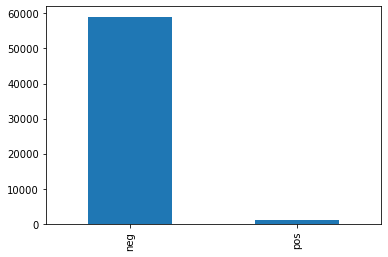

In [8]:
print(train_df['class'].value_counts())
train_df['class'].value_counts().plot(kind='bar')


neg    15625
pos      375
Name: class, dtype: int64


<AxesSubplot:>

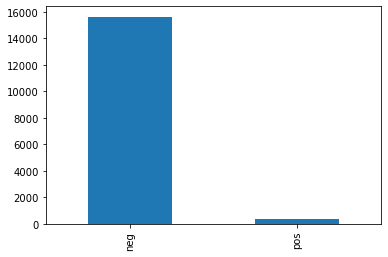

In [9]:
print(test_df['class'].value_counts())
test_df['class'].value_counts().plot(kind='bar')


**Observation:**
- This dataset is highly imbalanced dataset for both train and test
- Both dataset has a very high number of negative class

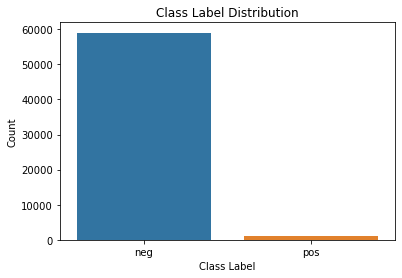

The number of positive class points is:  1000
The number of negative class points is:  59000


In [10]:
# Plotting the distribution of class label
sns.barplot(train_df['class'].unique(),train_df['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('The number of positive class points is: ',train_df['class'].value_counts()[1])
print('The number of negative class points is: ',train_df['class'].value_counts()[0])

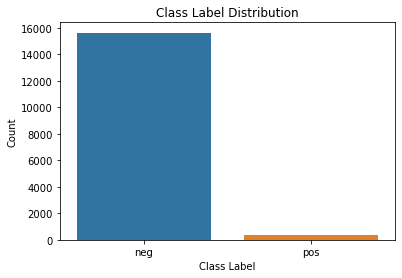

The number of positive class points is:  375
The number of negative class points is:  15625


In [11]:
# Plotting the distribution of class label
sns.barplot(test_df['class'].unique(),test_df['class'].value_counts())
plt.title('Class Label Distribution')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.show()

print('The number of positive class points is: ',test_df['class'].value_counts()[1])
print('The number of negative class points is: ',test_df['class'].value_counts()[0])

In [12]:
train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,NaN,NaN,NaN,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,NaN,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,NaN,NaN,NaN,NaN,NaN,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,1209600,0,NaN,NaN,NaN,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,NaN,0,3646660,NaN,6160,796,164860,350066,272956,1837600,301242,9148,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,NaN,NaN,NaN,NaN,NaN,NaN,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,NaN,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10580,12.69,21614,21

In [13]:
# Checking type for each column
print(train_df.info())
print('--------------------------------------')
print(train_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB
None
--------------------------------------
class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
ae_000    object
af_000    object
ag_000    object
ag_001    object
ag_002    object
ag_003    object
ag_004    object
ag_005    object
ag_006    object
ag_007    object
ag_008    object
ag_009    object
ah_000    object
ai_000    object
aj_000    object
ak_000    object
al_000    object
am_0      object
an_000    object
ao_000    object
ap_000    object
aq_000    object
ar_000    object
as_000    object
at_000    object
au_000    object
av_000    object
ax_000    object
ay_000    object
ay_001    object
ay_002    object
ay_003    object
ay_004    object
ay_005    object
ay_006    object
ay_007    object
ay_008    object
ay_009    object
az_000    object
az_001    object
az_002    object
az_003 

In [14]:
# Checking type for each column
print(test_df.info())
print('--------------------------------------')
print(test_df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 20.9+ MB
None
--------------------------------------
class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
ae_000    object
af_000    object
ag_000    object
ag_001    object
ag_002    object
ag_003    object
ag_004    object
ag_005    object
ag_006    object
ag_007    object
ag_008    object
ag_009    object
ah_000    object
ai_000    object
aj_000    object
ak_000    object
al_000    object
am_0      object
an_000    object
ao_000    object
ap_000    object
aq_000    object
ar_000    object
as_000    object
at_000    object
au_000    object
av_000    object
ax_000    object
ay_000    object
ay_001    object
ay_002    object
ay_003    object
ay_004    object
ay_005    object
ay_006    object
ay_007    object
ay_008    object
ay_009    object
az_000    object
az_001    object
az_002    object
az_003 

In [15]:
# Replacing class labels 'neg' --> 0 and 'pos' --> 1
def convert_class(x):
    if x["class"] == 'pos':
        cat_class = 1
    else:
        cat_class = 0
    return cat_class

# Convert class in train data
train_df["class"] = train_df.apply(convert_class, axis=1)
# Convert class in test data
test_df["class"] = test_df.apply(convert_class, axis=1)

In [16]:
train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,NaN,NaN,NaN,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,1209600,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,NaN,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,NaN,NaN,NaN,NaN,NaN,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,1209600,0,NaN,NaN,NaN,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,NaN,0,3646660,NaN,6160,796,164860,350066,272956,1837600,301242,9148,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,NaN,NaN,NaN,NaN,NaN,NaN,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,1209600,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,NaN,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10580,12.69,21614,21614,2177

In [17]:
test_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,cd_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,1209600,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,1209600,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,NaN,NaN,NaN,NaN,NaN,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,1209600,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,NaN,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,NaN,NaN,NaN,NaN,NaN,100120,59816.46,4201350,4201350,4203050,29967,26214,51894,562680,4030198,1209600,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,NaN,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2

In [18]:
# Checking columns with constant value
const_col = train_df.columns[train_df.nunique() <= 1]
const_col

Index(['cd_000'], dtype='object')

In [19]:
# Checking columns with constant value
const_col = test_df.columns[test_df.nunique() <= 1]
const_col

Index(['cd_000'], dtype='object')

In [20]:
# Removing column with constant value
train_df = train_df.drop(['cd_000'],axis=1)
test_df = test_df.drop(['cd_000'],axis=1)
print(train_df.shape, test_df.shape)

(60000, 170) (16000, 170)


**Observation:**
- There's 1 column ('cd_000') that has a constant value or null across data set
- This column will be dropped as it will not improve the model performance and may negatively affect the model by creating a bias in the data


***Reference: 
https://stackoverflow.com/questions/59209830/will-removing-a-column-having-same-values-for-all-observations-affect-my-model***

In [21]:
train_df = train_df.astype(int,errors='ignore')
test_df = test_df.astype(int,errors='ignore')

In [22]:
train_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,NaN,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,299160,305200,283680,NaN,NaN,NaN,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,NaN,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,NaN,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,366560,NaN,NaN,NaN,NaN,NaN,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,0,NaN,NaN,NaN,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,NaN,0,3646660,NaN,6160,796,164860,350066,272956,1837600,301242,9148,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,NaN,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,NaN,NaN,NaN,NaN,NaN,NaN,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,NaN,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,0,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,302,2,6

In [23]:
test_df.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bm_000,bn_000,bo_000,bp_000,bq_000,br_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cr_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,0,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,0,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,0,82,0,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,0,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,2,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,245240,NaN,NaN,NaN,NaN,NaN,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,0,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,NaN,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,159380,NaN,NaN,NaN,NaN,NaN,100120,59816.46,4201350,4201350,4203050,29967,26214,51894,562680,4030198,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,NaN,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,38710,0,0,0,0,27740,3335

In [24]:
# Checking % of missing values in each column #
print(train_df.shape)
train_df.isnull().mean().sort_values(ascending = False)*100

(60000, 170)


br_000    82.106667
bq_000    81.203333
bp_000    79.566667
bo_000    77.221667
ab_000    77.215000
cr_000    77.215000
bn_000    73.348333
bm_000    65.915000
bl_000    45.461667
bk_000    38.390000
cf_000    24.768333
co_000    24.768333
cg_000    24.768333
ad_000    24.768333
ch_000    24.768333
cv_000    23.013333
cu_000    23.013333
ct_000    23.013333
cx_000    23.013333
cy_000    23.013333
cz_000    23.013333
da_000    23.013333
db_000    23.013333
dc_000    23.013333
ec_00     17.065000
cm_000    16.461667
cl_000    15.921667
ed_000    15.921667
ak_000     7.333333
ca_000     7.260000
dm_000     6.681667
dh_000     6.680000
dg_000     6.680000
df_000     6.680000
dl_000     6.680000
eb_000     6.678333
dj_000     6.678333
dk_000     6.678333
di_000     6.676667
ac_000     5.558333
bx_000     5.428333
cc_000     5.425000
bd_000     4.545000
ds_000     4.545000
dt_000     4.545000
dv_000     4.543333
dp_000     4.543333
dq_000     4.543333
du_000     4.543333
dr_000     4.543333


In [25]:
# Checking % of missing values in each column #
print(test_df.shape)
test_df.isnull().mean().sort_values(ascending = False)*100

(16000, 170)


br_000    82.05625
bq_000    81.13125
bp_000    79.50625
bo_000    77.35000
ab_000    77.26875
cr_000    77.26875
bn_000    73.20625
bm_000    65.91250
bl_000    45.16250
bk_000    38.08750
cg_000    24.88125
cf_000    24.88125
ch_000    24.88125
co_000    24.88125
ad_000    24.88125
ct_000    23.23750
cu_000    23.23750
cv_000    23.23750
cx_000    23.23750
cy_000    23.23750
cz_000    23.23750
da_000    23.23750
db_000    23.23750
dc_000    23.23750
ec_00     16.52500
cm_000    16.11250
ed_000    15.36875
cl_000    15.36875
ca_000     7.53750
ak_000     7.48750
dm_000     6.83750
df_000     6.83750
dg_000     6.83750
dh_000     6.83750
di_000     6.83750
dj_000     6.83750
dk_000     6.83750
dl_000     6.83750
eb_000     6.83750
ac_000     5.78750
bx_000     5.41250
cc_000     5.40625
de_000     4.77500
bd_000     4.77500
ds_000     4.77500
dx_000     4.77500
ar_000     4.77500
do_000     4.77500
dp_000     4.77500
dq_000     4.77500
dy_000     4.77500
dr_000     4.77500
bc_000     4

**Observation:**\
For both train and test data:
1. Almost all columns has null values
2. 8 columns has more than 60% null values

In [26]:
train_df.bm_000.unique()

array(['299160', '366560', nan, ..., '110600', '268140', '308960'],
      dtype=object)

In [27]:
# Dropping features with more than 60% null values
train_removed = train_df.dropna(axis=1, thresh = int(0.4*train_df.shape[0]))
test_removed = test_df.dropna(axis=1, thresh = int(0.4*test_df.shape[0]))
print(train_removed.shape, test_removed.shape)

(60000, 162) (16000, 162)


In [28]:
# Checking % of missing values in each column after dropping column with more than 60% null values
train_removed.isnull().mean().sort_values(ascending = False)*100

bl_000    45.461667
bk_000    38.390000
cf_000    24.768333
ad_000    24.768333
co_000    24.768333
ch_000    24.768333
cg_000    24.768333
cx_000    23.013333
da_000    23.013333
cz_000    23.013333
cy_000    23.013333
ct_000    23.013333
cv_000    23.013333
cu_000    23.013333
dc_000    23.013333
db_000    23.013333
ec_00     17.065000
cm_000    16.461667
cl_000    15.921667
ed_000    15.921667
ak_000     7.333333
ca_000     7.260000
dm_000     6.681667
dh_000     6.680000
df_000     6.680000
dg_000     6.680000
dl_000     6.680000
dj_000     6.678333
dk_000     6.678333
eb_000     6.678333
di_000     6.676667
ac_000     5.558333
bx_000     5.428333
cc_000     5.425000
ds_000     4.545000
dt_000     4.545000
bd_000     4.545000
dr_000     4.543333
dq_000     4.543333
du_000     4.543333
dv_000     4.543333
dp_000     4.543333
bc_000     4.541667
de_000     4.540000
dy_000     4.540000
do_000     4.540000
cp_000     4.540000
ef_000     4.540000
bz_000     4.538333
eg_000     4.538333


In [29]:
# Checking % of missing values in each column after dropping column with more than 60% null values
test_removed.isnull().mean().sort_values(ascending = False)*100

bl_000    45.16250
bk_000    38.08750
ch_000    24.88125
cg_000    24.88125
ad_000    24.88125
cf_000    24.88125
co_000    24.88125
cx_000    23.23750
dc_000    23.23750
db_000    23.23750
da_000    23.23750
cz_000    23.23750
cy_000    23.23750
cv_000    23.23750
cu_000    23.23750
ct_000    23.23750
ec_00     16.52500
cm_000    16.11250
ed_000    15.36875
cl_000    15.36875
ca_000     7.53750
ak_000     7.48750
dj_000     6.83750
df_000     6.83750
dg_000     6.83750
dh_000     6.83750
di_000     6.83750
dk_000     6.83750
dl_000     6.83750
dm_000     6.83750
eb_000     6.83750
ac_000     5.78750
bx_000     5.41250
cc_000     5.40625
ar_000     4.77500
dy_000     4.77500
dx_000     4.77500
dv_000     4.77500
du_000     4.77500
dt_000     4.77500
ds_000     4.77500
dr_000     4.77500
dq_000     4.77500
dp_000     4.77500
de_000     4.77500
do_000     4.77500
bc_000     4.77500
bd_000     4.77500
bz_000     4.76875
cp_000     4.76875
eg_000     4.76250
dz_000     4.76250
ea_000     4

### Impute Missing Data using SimpleImputer (mean)

Reference: https://scikit-learn.org/stable/modules/impute.html

In [30]:
train_removed.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,76698,2130706438,280,0,0,0,0,0,0,37250,1432864,3664156,1007684,25896,0,2551696,0,0,0,0,0,4933296,3655166,1766008,1132040,0,0,0,0,1012,268,0,0,0,0,0,469014,4239660,703300,755876,0,5374,2108,4114,12348,615248,5526276,2378,4,0,0,2328746,1022304,415432,287230,310246,681504,1118814,3574,0,0,6700214,0,10,108,50,2551696,97518,947550,799478,330760,353400,178540,76698.08,6700214,6700214,6599892,43566,68656,54064,638360,6167850,246244,2,96,0,5245752,0,916567.68,6,1924,0,0,0,118196,1309472,3247182,1381362,98822,11208,1608,220,240,6700214,10476,1226,267998,521832,428776,4015854,895240,26330,118,0,532,734,4122704,51288,0,532572,0,18,5330690,4732,1126,0,0,0,0,0,0,0,0,62282,85908,32790,0,0,202710,37928,14745580,1876644,0,0,0,0,2801180,2445.8,2712,965866,1706908,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,0,33058,0,NaN,0,0,0,0,0,0,18254,653294,1720800,516724,31642,0,1393352,0,68,0,0,0,2560898,2127150,1084598,338544,0,0,0,0,0,0,0,0,0,0,0,71510,772720,1996924,99560,0,7336,7808,13776,13086,1010074,1873902,14726,6,0,0,1378576,447166,199512,154298,137280,138668,165908,229652,87082,4708,3646660,86,454,364,350,1393352,49028,688314,392208,341420,359780,6700,33057.51,3646660,3646660,3582034,17733,260120,115626,6900,2942850,0,NaN,NaN,NaN,2291079.36,0,643536.96,0,0,0,0,38,98644,1179502,1286736,336388,36294,5192,56,NaN,0,3646660,6160,796,164860,350066,272956,1837600,301242,9148,22,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312,522,0,0,0,0,0,0,0,0,33736,36946,5936,0,0,103330,16254,4510080,868538,0,0,0,0,3477820,2211.76,2334,664504,824154,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,0,41040,228,100,0,0,0,0,0,0,1648,370592,1883374,292936,12016,0,1234132,0,0,0,0,0,2371990,2173634,300796,153698,0,0,0,0,358,110,0,0,0,0,0,0,870456,239798,1450312,0,1620,1156,1228,34250,1811606,710672,34,0,0,0,790690,672026,332340,254892,189596,135758,103552,81666,46,0,2673338,128,202,576,4,1234132,28804,160176,139730,137160,130640,28000,41040.08,2673338,2673338,2678534,15439,7466,22436,248240,2560566,63328,0,124,0,2322692.16,0,236099.52,0,0,0,0,0,33276,1215280,1102798,196502,10260,2422,28,0,6,2673338,3584,500,56362,149726,100326,1744838,488302,16682,246,0,230,292,2180528,29188,22,20346,0,0,2341048,1494,152,0,0,0,0,0,0,0,0,13876,38182,8138,0,0,65772,10534,300240,48028,0,0,0,0,1040120,1018.64,1020,262032,453378,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,0,12,70,66,0,10,0,0,0,318,2212,3232,1872,0,0,0,2668,0,0,0,642,3894,10184,7554,10764,1014,0,0,0,0,60,6,0,0,0,0,0,0,0,2038,5596,0,64,6,6,914,76,2478,2398,1692,0,0,6176,340,304,102,74,406,216,16,0,0,21614,2,12,0,0,2668,184,7632,3090,NaN,NaN,10580,12.69,21614,21614,21772,32,50,1994,21400,7710,302,2,6,0,2135.04,0,4525.44,2,16,0,52,2544,1894,2170,822,152,0,0,0,2,2,21614,1032,6,24,656,692,4836,388,0,0,0,138,8,1666,72,0,12,0,0,2578,76,62,0,0,0,0,0,0,0,0,232,0,0,2014,370,48,18,15740,1822,201

In [31]:
test_removed.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0,60,20,12,0,0,0,0,0,2682,4736,3862,1846,0,0,0,3976,0,0,0,1520,2374,11516,9480,111258,470,0,0,0,0,58,26,0,0,0,0,0,0,0,0,13124,2,1956,434,76,174,190,6198,1148,2948,2,0,8762,2566,480,380,196,516,86,66,74,0,124340,4,6,4,0,3976,318,107662,3458,NaN,NaN,110980,59.53,124340,124340,184970,54,686,12246,123880,13196,598,0,6,0,5913.6,0,5851.2,6,30,0,2,5512,4674,1388,1508,38,4,0,0,8,12,124340,1550,14,36,26,920,430,7650,2294,206,0,22,42,5336,1276,0,0,0,0,6598,70,112,0,0,0,0,0,0,0,0,340,0,0,1100,574,232,66,780,882,0,4,0,0,0,465.5,90,7502,3156,1098,138,412,654,78,88,0,0,0,0
1,0,82,68,40,0,0,0,0,0,0,748,12594,3636,0,0,0,5244,0,60,0,0,0,23174,18166,23686,1270,0,0,0,0,12,82,0,0,0,0,0,0,0,692,16286,0,280,44,50,1274,866,3362,11102,0,0,0,12564,1756,638,276,172,132,812,308,192,128,46894,4,2,38,0,5244,360,20520,3134,NaN,NaN,23320,81.89,46894,46894,48324,68,0,4486,46480,17050,726,2,4,0,7224.96,0,7768.32,0,42,0,0,4,7064,6200,2452,1246,12,0,0,14,54,46894,2202,28,114,350,700,1708,9622,2174,80,0,80,206,7802,1466,0,0,0,0,7918,78,40,0,0,0,0,0,0,0,0,352,0,0,3996,584,200,62,37580,3756,6368,36,0,0,0,2.86,102,10040,3310,1068,276,1620,116,86,462,0,0,0,0
2,0,66002,212,112,0,0,0,0,0,199486,1358536,1952422,452706,25130,520,0,1891670,0,0,0,77898,110548,3605894,3291610,959756,286536,0,0,0,0,106,340,0,0,0,0,0,24286,681260,2808472,474782,0,22984,894,1162,1304,1856,388700,3424812,123828,23260,0,1662580,667960,387998,226078,161558,148288,154908,220820,147744,210866,4644422,958,7848,3624,0,1891670,47066,692800,265492,336240,194360,175480,66002.89,4644422,4644422,4608738,22706,2272,95510,1006260,3991552,126310,0,104,0,3594885.12,0,374649.6,148,720,0,5154,174956,622312,1002504,793938,541734,345896,300806,201500,52,92,4644422,24818,964,162660,215004,217930,3038612,322718,6080,14,0,226,572,3593728,1911060,0,284,0,0,3613906,4218,692,0,0,0,0,0,0,0,0,25278,9438,2504,10262714,1278664,109700,19072,9520,4902,4434614,70900,0,0,26002880,2057.84,2158,396312,538136,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,0,59816,1010,936,0,0,0,0,0,0,123922,984314,1680050,1135268,92606,14038,1772828,0,0,0,1116,2372,3546760,3053176,652616,423374,0,0,7274,0,1622,432,0,0,0,0,0,6388,1091104,2930694,2012,0,3526,904,1426,223226,2663348,1137664,104,0,0,0,1283806,928212,345132,265930,194770,158262,219942,620264,13880,0,4201350,98,238,880,16,1772828,51468,331744,316130,176000,208420,100120,59816.46,4201350,4201350,4203050,29967,26214,51894,562680,4030198,114684,0,144,0,3387773.76,38633.28,599624.64,0,0,0,0,14308,475410,1109740,1528024,837114,58942,6220,440,1278,1292,4201350,6846,810,70090,345884,191284,2454600,926846,33558,280,0,1516,1398,2050280,64066,0,674,0,46,3413978,2924,414,0,0,60,38710,0,0,0,0,27740,33354,6330,0,0,133542,21290,2718360,435370,0,0,0,0,1179900,1541.32,1678,659550,691580,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,0,1814,156,140,0,0,0,0,0,0,72,17926,

In [32]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer()
train_imputed = pd.DataFrame(my_imputer.fit_transform(train_removed),columns=train_removed.columns)
test_imputed = pd.DataFrame(my_imputer.fit_transform(test_removed),columns=test_removed.columns)


In [33]:
test_imputed.head()

,class,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,0.0,60.0,20.0,12.0,0.0,0.0,0.0,0.0,0.0,2682.0,4736.0,3862.0,1846.0,0.0,0.0,0.0,3976.0,0.0,0.0,0.0,1520.0,2374.0,11516.0,9480.0,111258.0,470.0,0.0,0.0,0.0,0.0,58.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13124.0,2.0,1956.0,434.0,76.0,174.0,190.0,6198.0,1148.0,2948.0,2.0,0.0,8762.0,2566.0,480.0,380.0,196.0,516.0,86.0,66.0,74.0,0.0,124340.0,4.0,6.0,4.0,0.0,3976.0,318.0,107662.0,3458.0,280200.504745,320483.011169,110980.0,59.53,124340.0,124340.0,184970.0,54.0,686.0,12246.0,123880.0,13196.0,598.0,0.0,6.0,0.0,5913.60,0.00,5851.20,6.0,30.0,0.0,2.0,5512.0,4674.0,1388.0,1508.0,38.0,4.0,0.0,0.0,8.0,12.0,124340.0,1550.0,14.0,36.0,26.0,920.0,430.0,7650.0,2294.0,206.0,0.0,22.0,42.0,5336.0,1276.0,0.0,0.0,0.0,0.0,6598.0,70.0,112.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,340.0,0.0,0.0,1100.0,574.0,232.0,66.0,780.0,882.0,0.0,4.0,0.0,0.0,0.0,465.50,90.0,7502.0,3156.0,1098.0,138.0,412.0,654.0,78.0,88.0,0.0,0.0,0.0,0.0
1,0.0,82.0,68.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,748.0,12594.0,3636.0,0.0,0.0,0.0,5244.0,0.0,60.0,0.0,0.0,0.0,23174.0,18166.0,23686.0,1270.0,0.0,0.0,0.0,0.0,12.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,692.0,16286.0,0.0,280.0,44.0,50.0,1274.0,866.0,3362.0,11102.0,0.0,0.0,0.0,12564.0,1756.0,638.0,276.0,172.0,132.0,812.0,308.0,192.0,128.0,46894.0,4.0,2.0,38.0,0.0,5244.0,360.0,20520.0,3134.0,280200.504745,320483.011169,23320.0,81.89,46894.0,46894.0,48324.0,68.0,0.0,4486.0,46480.0,17050.0,726.0,2.0,4.0,0.0,7224.96,0.00,7768.32,0.0,42.0,0.0,0.0,4.0,7064.0,6200.0,2452.0,1246.0,12.0,0.0,0.0,14.0,54.0,46894.0,2202.0,28.0,114.0,350.0,700.0,1708.0,9622.0,2174.0,80.0,0.0,80.0,206.0,7802.0,1466.0,0.0,0.0,0.0,0.0,7918.0,78.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,352.0,0.0,0.0,3996.0,584.0,200.0,62.0,37580.0,3756.0,6368.0,36.0,0.0,0.0,0.0,2.86,102.0,10040.0,3310.0,1068.0,276.0,1620.0,116.0,86.0,462.0,0.0,0.0,0.0,0.0
2,0.0,66002.0,212.0,112.0,0.0,0.0,0.0,0.0,0.0,199486.0,1358536.0,1952422.0,452706.0,25130.0,520.0,0.0,1891670.0,0.0,0.0,0.0,77898.0,110548.0,3605894.0,3291610.0,959756.0,286536.0,0.0,0.0,0.0,0.0,106.0,340.0,0.0,0.0,0.0,0.0,0.0,24286.0,681260.0,2808472.0,474782.0,0.0,22984.0,894.0,1162.0,1304.0,1856.0,388700.0,3424812.0,123828.0,23260.0,0.0,1662580.0,667960.0,387998.0,226078.0,161558.0,148288.0,154908.0,220820.0,147744.0,210866.0,4644422.0,958.0,7848.0,3624.0,0.0,1891670.0,47066.0,692800.0,265492.0,336240.000000,194360.000000,175480.0,66002.89,4644422.0,4644422.0,4608738.0,22706.0,2272.0,95510.0,1006260.0,3991552.0,126310.0,0.0,104.0,0.0,3594885.12,0.00,374649.60,148.0,720.0,0.0,5154.0,174956.0,622312.0,1002504.0,793938.0,541734.0,345896.0,300806.0,201500.0,52.0,92.0,4644422.0,24818.0,964.0,162660.0,215004.0,217930.0,3038612.0,322718.0,6080.0,14.0,0.0,226.0,572.0,3593728.0,1911060.0,0.0,284.0,0.0,0.0,3613906.0,4218.0,692.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25278.0,9438.0,2504.0,10262714.0,1278664.0,109700.0,19072.0,9520.0,4902.0,4434614.0,70900.0,0

In [34]:
# Taking class column as output variable
y_train = train_imputed['class']
y_test = test_imputed['class']
# Dropping output variable from train dataframe
x_train = train_imputed.drop(['class'],axis=1)
x_test = test_imputed.drop(['class'],axis=1)

### Feature selection using RFE

***Reference: https://machinelearningmastery.com/rfe-feature-selection-in-python/***

#### RFE using RandomForestClassifier

In [35]:
y_train.value_counts()

0.0    59000
1.0     1000
Name: class, dtype: int64

In [36]:
y_test.value_counts()

0.0    15625
1.0      375
Name: class, dtype: int64

##### Selecting 50 features using Random Forest

In [37]:
selector = RFE(RandomForestClassifier(n_estimators = 100), 50, step = 50, verbose = 1)
selector = selector.fit(x_train,y_train)

Fitting estimator with 161 features.
Fitting estimator with 111 features.
Fitting estimator with 61 features.


In [38]:
# 50 features using Random Forest
y_pred = selector.predict_proba(x_test)
y_prob = y_pred[:,1]
y_class = np.where(y_pred[:,1] >= 0.5,1,0)
print(confusion_matrix(y_test, y_class))

[[15608    17]
 [  100   275]]


In [39]:
print(classification_report(y_test,y_class))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     15625
         1.0       0.94      0.73      0.82       375

    accuracy                           0.99     16000
   macro avg       0.97      0.87      0.91     16000
weighted avg       0.99      0.99      0.99     16000



In [40]:
features = x_train.columns
# To know which features the algorithm ended up choosing #
features[selector.support_]

Index(['aa_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_006', 'ai_000',
       'al_000', 'am_0', 'ao_000', 'ap_000', 'aq_000', 'ay_003', 'ay_005',
       'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_001', 'az_002', 'az_003',
       'bb_000', 'bg_000', 'bh_000', 'bj_000', 'bk_000', 'bs_000', 'bt_000',
       'bu_000', 'bv_000', 'bx_000', 'cc_000', 'ci_000', 'ck_000', 'cl_000',
       'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_007', 'cq_000',
       'cs_002', 'cs_005', 'dn_000', 'do_000', 'ee_002', 'ee_003', 'ee_005',
       'ee_007'],
      dtype='object')

##### Selecting 40 features using Random Forest

In [41]:
selector = RFE(RandomForestClassifier(n_estimators = 100), 40, step = 50, verbose = 1)
selector = selector.fit(x_train,y_train)

Fitting estimator with 161 features.
Fitting estimator with 111 features.
Fitting estimator with 61 features.


In [42]:
y_pred = selector.predict_proba(x_test)
y_prob = y_pred[:,1]
y_class = np.where(y_pred[:,1] >= 0.5,1,0)
print(confusion_matrix(y_test, y_class))

[[15606    19]
 [  108   267]]


In [43]:
print(classification_report(y_test,y_class))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     15625
         1.0       0.93      0.71      0.81       375

    accuracy                           0.99     16000
   macro avg       0.96      0.86      0.90     16000
weighted avg       0.99      0.99      0.99     16000



In [44]:
features = x_train.columns
# To know which features the algorithm ended up choosing #
features[selector.support_]

Index(['aa_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006',
       'ah_000', 'ai_000', 'al_000', 'am_0', 'an_000', 'ap_000', 'aq_000',
       'ay_002', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'az_001', 'ba_002',
       'bb_000', 'bj_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000',
       'cc_000', 'ci_000', 'ck_000', 'cn_000', 'cn_001', 'cn_002', 'cn_004',
       'cq_000', 'dn_000', 'ee_000', 'ee_005', 'ee_007'],
      dtype='object')

The SMOTE paper here https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3648438/ describes that the feature selection should be performed before sampling

### Feature scaling 
    * not used in the chosen models (XGBoost and Random Forest)
- Feature scaling is needed for Distance-Based algorithms (Logistic Regression) and Gradient Descent Based Algorithm (kNN, SVM)
- We will try both Standardization (StandardScaler) and Normalization (MinMaxScaler)

***Reference: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/***

In [45]:
scaler = MinMaxScaler().fit(x_train)
x_train_norm = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_train_norm.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,6.000000e+04,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.021604,1.670874e-01,2.220573e-05,0.000324,0.000548,0.000066,0.000237,0.000816,0.001397,0.001910,0.006186,0.017632,0.007882,0.002009,0.000203,0.024377,0.000546,0.000203,0.000094,0.001701,0.001669,0.024570,0.024570,0.012885,0.017307,0.001420,0.000077,0.000488,0.000088,0.001407,0.003209,0.000242,0.000127,0.000385,0.000518,0.000264,0.000896,0.008447,0.003157,0.010052,0.000062,0.000775,0.000976,0.000567,0.001914,0.012003,0.004565,1.577576e-03,0.000444,0.000340,0.000063,0.006010,0.007689,0.007402,0.007419,0.008143,0.009836,0.011087,0.012979,1.147664e-03,0.000818,0.023467,0.001435,0.003008,0.001693,0.001467,0.024370,0.018104,0.010953,0.011153,0.213954,0.245177,0.077475,0.021633,0.023411,0.023411,0.022066,0.021985,2.514907e-03,0.323827,0.335371,0.025593,0.013110,2.21

In [46]:
scaler = MinMaxScaler().fit(x_test)
x_test_norm = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_test_norm.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,1.600000e+04,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000,16000.000000
mean,0.001583,1.680378e-01,0.005050,0.000582,0.000719,0.000164,0.000197,0.000720,0.001542,0.002588,0.006977,0.022077,0.014468,0.002043,0.000414,0.023366,0.000662,0.000321,0.000085,0.001876,0.002017,0.024426,0.022269,0.009310,0.013735,0.002541,0.000110,0.000532,0.000098,0.004173,0.007226,0.000341,0.000268,0.000422,0.000614,0.000566,0.002751,0.012152,0.009650,0.003621,0.000208,0.001754,0.003012,0.003742,0.002318,0.011602,0.004709,2.656384e-03,0.001710,0.000643,0.000135,0.009679,0.006631,0.008992,0.008840,0.009086,0.010328,0.013681,0.012354,0.001982,0.001129,0.020446,0.003305,0.003861,0.003437,0.002784,0.023382,0.016003,0.009527,0.008684,0.213779,0.244513,0.078736,0.001585,0.020392,0.020392,0.008095,0.024810,4.866116e-03,0.330019,0.340063,0.007899,0.014556,0.000492,0.0

In [47]:
scaler = StandardScaler().fit(x_train)
x_train_std = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_train_std.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04,6.000000e+04
mean,-1.963786e-16,-3.971268e-17,-1.742805e-16,2.974463e-16,4.595854e-16,2.021522e-15,-1.133445e-15,3.729882e-15,-2.507181e-15,8.449722e-17,1.167353e-16,1.734909e-17,-8.631891e-16,7.854636e-16,-1.163173e-15,-5.116278e-18,-6.899416e-16,-8.456299e-16,-1.496838e-15,3.803855e-17,-6.989349e-16,-2.716554e-17,2.193338e-17,-2.036380e-17,-1.448286e-17,-1.920915e-15,2.080810e-15,-1.237454e-15,-1.777185e-15,-3.563363e-16,2.065244e-16,3.303962e-16,-9.905218e-16,1.166991e-16,5.910816e-16,1.483624e-15,5.698882e-16,1.353400e-15,1.322197e-16,1.515986e-16,8.321293e-16,-5.484964e-18,1.403345e-16,1.936692e-17,-6.872558e-16,1.859563e-16,-5.620689e-17,-4.092624e-16,2.274228e-15,3.959295e-15,-1.477272e-15,1.610533e-16,8.358962e-17,-1.230439e-16,1.707798e-16,-7.852463e-17,6.124360e-17,-2.

In [48]:
scaler = StandardScaler().fit(x_test)
x_test_std = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
x_test_std.describe()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,ag_005,ag_006,ag_007,ag_008,ag_009,ah_000,ai_000,aj_000,ak_000,al_000,am_0,an_000,ao_000,ap_000,aq_000,ar_000,as_000,at_000,au_000,av_000,ax_000,ay_000,ay_001,ay_002,ay_003,ay_004,ay_005,ay_006,ay_007,ay_008,ay_009,az_000,az_001,az_002,az_003,az_004,az_005,az_006,az_007,az_008,az_009,ba_000,ba_001,ba_002,ba_003,ba_004,ba_005,ba_006,ba_007,ba_008,ba_009,bb_000,bc_000,bd_000,be_000,bf_000,bg_000,bh_000,bi_000,bj_000,bk_000,bl_000,bs_000,bt_000,bu_000,bv_000,bx_000,by_000,bz_000,ca_000,cb_000,cc_000,ce_000,cf_000,cg_000,ch_000,ci_000,cj_000,ck_000,cl_000,cm_000,cn_000,cn_001,cn_002,cn_003,cn_004,cn_005,cn_006,cn_007,cn_008,cn_009,co_000,cp_000,cq_000,cs_000,cs_001,cs_002,cs_003,cs_004,cs_005,cs_006,cs_007,cs_008,cs_009,ct_000,cu_000,cv_000,cx_000,cy_000,cz_000,da_000,db_000,dc_000,dd_000,de_000,df_000,dg_000,dh_000,di_000,dj_000,dk_000,dl_000,dm_000,dn_000,do_000,dp_000,dq_000,dr_000,ds_000,dt_000,du_000,dv_000,dx_000,dy_000,dz_000,ea_000,eb_000,ec_00,ed_000,ee_000,ee_001,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04,1.600000e+04
mean,-9.364905e-17,-2.348816e-17,-4.235154e-17,4.668974e-16,-7.900247e-16,-1.295941e-15,3.584004e-16,1.200811e-15,2.321580e-17,3.806677e-17,1.391248e-17,-5.433848e-17,1.430973e-16,7.996659e-16,3.749214e-16,-4.849246e-17,2.926832e-15,-7.977773e-16,-5.599410e-16,-9.885790e-16,-3.159504e-16,3.775799e-17,-3.345935e-17,-7.847889e-18,-4.652875e-17,-7.837914e-16,1.065743e-15,1.092697e-15,1.034610e-15,-8.209058e-17,-2.996214e-17,-5.953185e-16,-1.380345e-15,-2.530988e-16,-5.208195e-16,-1.121402e-15,2.769521e-16,1.610517e-17,-1.416610e-16,5.531686e-17,7.895824e-16,6.277097e-18,3.927587e-17,1.593690e-17,-2.028412e-17,-2.042463e-17,3.181483e-17,-1.160183e-16,-2.839274e-16,-6.678096e-16,1.238643e-15,-4.283726e-17,-3.125972e-18,-4.657386e-17,1.802725e-17,1.854072e-17,1.638620e-17

### Testing models

#### 1. Random Forest, on imbalanced data, no feature selection, no hyperparamter tuning, mean imputed for missing values


In [63]:
# model fitting using the best parameter and predicting the cost
clf = RandomForestClassifier(n_estimators= 1000 ,max_depth=10,n_jobs= -1)
clf.fit(x_train,y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print('Accuracy score:',accuracy_score(y_test, y_pred_test))

Accuracy score: 0.991


Confusion matrix heatmap for train dataset:


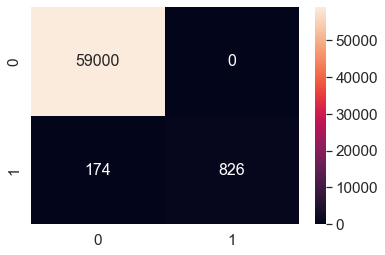

In [64]:
print("Confusion matrix heatmap for train dataset:")
df_cm_train = pd.DataFrame(conf_matrix_train)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_train, annot=True, annot_kws={"size": 16},fmt='d') # font size, showing integer
plt.show()

In [65]:
print("Calculating cost for predicted value in train dataset...")
print("------------------------")
print("FP = ", conf_matrix_train[0][1])
print("FN = ", conf_matrix_train[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_train[0][1],"= $",conf_matrix_train[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_train[1][0],"= $",conf_matrix_train[1][0] * 500)
print("Total cost for Train = $", conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500)


Calculating cost for predicted value in train dataset...
------------------------
FP =  0
FN =  174
------------------------
Cost_1 = $10 * 0 = $ 0
Cost_2 = $500 * 174 = $ 87000
Total cost for Train = $ 87000


In [66]:
tot_train_rf1 = conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500
print(tot_train_rf1)

87000


Confusion matrix heatmap for test dataset:


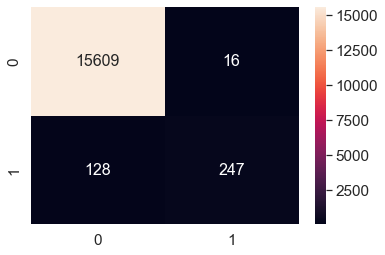

In [67]:
print("Confusion matrix heatmap for test dataset:")

df_cm_test = pd.DataFrame(conf_matrix_test)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_test, annot=True, annot_kws={"size": 16},fmt='d') # font size, showing integer
plt.show()

In [68]:
print("Calculating cost for predicted value in test dataset...")
print("------------------------")
print("FP = ", conf_matrix_test[0][1])
print("FN = ", conf_matrix_test[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_test[0][1],"= $",conf_matrix_test[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_test[1][0],"= $",conf_matrix_test[1][0] * 500)
print("Total cost for Test = $", conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500)


Calculating cost for predicted value in test dataset...
------------------------
FP =  16
FN =  128
------------------------
Cost_1 = $10 * 16 = $ 160
Cost_2 = $500 * 128 = $ 64000
Total cost for Test = $ 64160


In [69]:
tot_test_rf1 = conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500
print(tot_test_rf1)

64160


In [70]:
print("Classification Report for Random Forest without SMOTE:")
print(classification_report(y_test,y_pred_test))

Classification Report for Random Forest without SMOTE:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     15625
         1.0       0.94      0.66      0.77       375

    accuracy                           0.99     16000
   macro avg       0.97      0.83      0.88     16000
weighted avg       0.99      0.99      0.99     16000



#### 2.  XGBoost, on imbalanced data, no feature selection, no hyperparamter tuning, mean imputed for missing values


In [71]:
# model fitting using the best parameter and predicting the cost
xgb_cl = XGBClassifier()
xgb_cl.fit(x_train,y_train)
y_pred_train = xgb_cl.predict(x_train)
y_pred_test = xgb_cl.predict(x_test)

conf_matrix_train = confusion_matrix(y_train, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print('Accuracy score:',accuracy_score(y_test, y_pred_test))

[17:04:47] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy score: 0.9934375


Confusion matrix heatmap for train dataset:


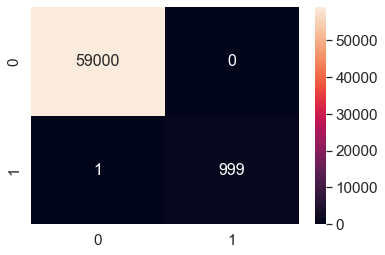

In [72]:
print("Confusion matrix heatmap for train dataset:")
df_cm_train = pd.DataFrame(conf_matrix_train)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_train, annot=True, annot_kws={"size": 16},fmt='d') # font size, showing integer
plt.show()

In [73]:
print("Calculating cost for predicted value in train dataset...")
print("------------------------")
print("FP = ", conf_matrix_train[0][1])
print("FN = ", conf_matrix_train[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_train[0][1],"= $",conf_matrix_train[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_train[1][0],"= $",conf_matrix_train[1][0] * 500)
print("Total cost for Train = $", conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500)


Calculating cost for predicted value in train dataset...
------------------------
FP =  0
FN =  1
------------------------
Cost_1 = $10 * 0 = $ 0
Cost_2 = $500 * 1 = $ 500
Total cost for Train = $ 500


In [76]:
tot_train_xgb1 = conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500
print(tot_train_xgb1)

500


Confusion matrix heatmap for test dataset:


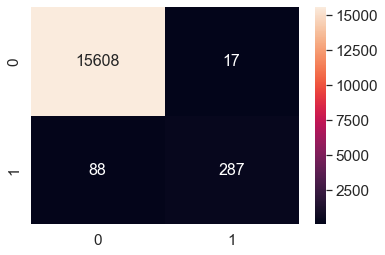

In [77]:
print("Confusion matrix heatmap for test dataset:")

df_cm_test = pd.DataFrame(conf_matrix_test)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_test, annot=True, annot_kws={"size": 16},fmt='d') # font size, 
plt.show()

In [78]:
print("Calculating cost for predicted value in train dataset...")
print("------------------------")
print("FP = ", conf_matrix_test[0][1])
print("FN = ", conf_matrix_test[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_test[0][1],"= $",conf_matrix_test[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_test[1][0],"= $",conf_matrix_test[1][0] * 500)
print("Total cost for Test = $", conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500)


Calculating cost for predicted value in train dataset...
------------------------
FP =  17
FN =  88
------------------------
Cost_1 = $10 * 17 = $ 170
Cost_2 = $500 * 88 = $ 44000
Total cost for Test = $ 44170


In [79]:
tot_test_xgb1 = conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500
print(tot_test_xgb1)

44170


In [80]:
print("Classification Report for XGBoost without SMOTE:")
print(classification_report(y_test,y_pred_test))

Classification Report for XGBoost without SMOTE:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00     15625
         1.0       0.94      0.77      0.85       375

    accuracy                           0.99     16000
   macro avg       0.97      0.88      0.92     16000
weighted avg       0.99      0.99      0.99     16000



**Observation from running XGBoost and Random Forest without SMOTE:**
- Both models are giving high accuracy score, due to the highly imbalanced dataset
- Model can predict negative class better
- False negative is affecting the cost hugely
- Accuracy score is not a good evaluation metrics for imbalanced dataset

### SMOTE to handle imbalanced dataset

In [81]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 59000, 1.0: 1000})
Resample dataset shape Counter({0.0: 59000, 1.0: 59000})


#### 3. Random forest, SMOTE oversampling to handle imbalanced data, no feature selection, no hyperparamter tuning, mean imputed for missing values


In [82]:
# model fitting using the best parameter and predicting the cost
clf = RandomForestClassifier(n_estimators= 1000 ,max_depth=10,n_jobs= -1)
clf.fit(x_smote,y_smote)
y_pred_train = clf.predict(x_smote)
y_pred_test = clf.predict(x_test)

In [83]:
conf_matrix_train = confusion_matrix(y_smote, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print('Accuracy score:',accuracy_score(y_test, y_pred_test))

Accuracy score: 0.9765625


Confusion matrix heatmap for train dataset:


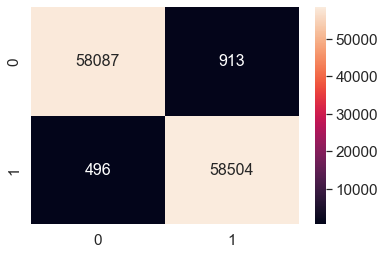

In [84]:
print("Confusion matrix heatmap for train dataset:")
df_cm_train = pd.DataFrame(conf_matrix_train)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_train, annot=True, annot_kws={"size": 16},fmt='d') # font size, showing integer
plt.show()

In [85]:
print("Calculating cost for predicted value in train dataset...")
print("------------------------")
print("FP = ", conf_matrix_train[0][1])
print("FN = ", conf_matrix_train[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_train[0][1],"= $",conf_matrix_train[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_train[1][0],"= $",conf_matrix_train[1][0] * 500)
print("Total cost for Train = $", conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500)


Calculating cost for predicted value in train dataset...
------------------------
FP =  913
FN =  496
------------------------
Cost_1 = $10 * 913 = $ 9130
Cost_2 = $500 * 496 = $ 248000
Total cost for Train = $ 257130


In [86]:
tot_train_rf2 = conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500
print(tot_train_rf2)

257130


Confusion matrix heatmap for test dataset:


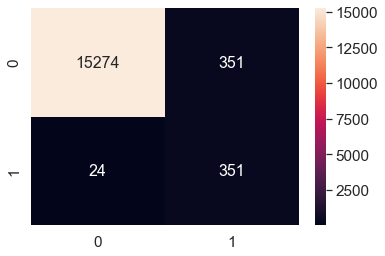

In [87]:
print("Confusion matrix heatmap for test dataset:")

df_cm_test = pd.DataFrame(conf_matrix_test)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_test, annot=True, annot_kws={"size": 16},fmt='d') # font size, 
plt.show()

In [88]:
print("Calculating cost for predicted value in train dataset...")
print("------------------------")
print("FP = ", conf_matrix_test[0][1])
print("FN = ", conf_matrix_test[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_test[0][1],"= $",conf_matrix_test[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_test[1][0],"= $",conf_matrix_test[1][0] * 500)
print("Total cost for Test = $", conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500)


Calculating cost for predicted value in train dataset...
------------------------
FP =  351
FN =  24
------------------------
Cost_1 = $10 * 351 = $ 3510
Cost_2 = $500 * 24 = $ 12000
Total cost for Test = $ 15510


In [89]:
tot_test_rf2 = conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500
print(tot_test_rf2)

15510


In [90]:
print("Classification Report for Random Forest with SMOTE:")
print(classification_report(y_test,y_pred_test))

Classification Report for Random Forest with SMOTE:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.50      0.94      0.65       375

    accuracy                           0.98     16000
   macro avg       0.75      0.96      0.82     16000
weighted avg       0.99      0.98      0.98     16000



#### 4. XGBoost, SMOTE oversampling to handle imbalanced data, no feature selection, no hyperparamter tuning, mean imputed for missing values


In [91]:
# model fitting using the best parameter and predicting the cost
xgb_cl = XGBClassifier()
xgb_cl.fit(x_smote,y_smote)
y_pred_train = xgb_cl.predict(x_smote)
y_pred_test = xgb_cl.predict(x_test)


[17:16:48] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [92]:
conf_matrix_train = confusion_matrix(y_smote, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print('Accuracy score:',accuracy_score(y_test, y_pred_test))

Accuracy score: 0.97925


Confusion matrix heatmap for train dataset:


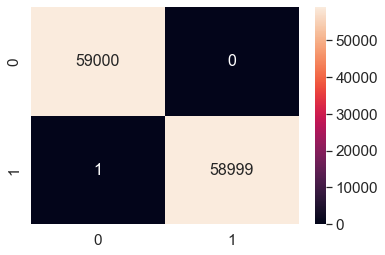

In [93]:
print("Confusion matrix heatmap for train dataset:")
df_cm_train = pd.DataFrame(conf_matrix_train)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_train, annot=True, annot_kws={"size": 16},fmt='d') # font size, showing integer
plt.show()

In [94]:
print("Calculating cost for predicted value in train dataset...")
print("------------------------")
print("FP = ", conf_matrix_train[0][1])
print("FN = ", conf_matrix_train[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_train[0][1],"= $",conf_matrix_train[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_train[1][0],"= $",conf_matrix_train[1][0] * 500)
print("Total cost for Train = $", conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500)


Calculating cost for predicted value in train dataset...
------------------------
FP =  0
FN =  1
------------------------
Cost_1 = $10 * 0 = $ 0
Cost_2 = $500 * 1 = $ 500
Total cost for Train = $ 500


In [95]:
tot_train_xgb2 = conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500
print(tot_train_xgb2)

500


Confusion matrix heatmap for test dataset:


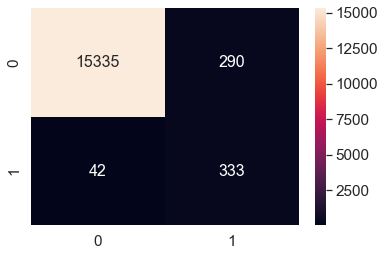

In [96]:
print("Confusion matrix heatmap for test dataset:")

df_cm_test = pd.DataFrame(conf_matrix_test)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_test, annot=True, annot_kws={"size": 16},fmt='d') # font size, 
plt.show()

In [97]:
print("Calculating cost for predicted value in train dataset...")
print("------------------------")
print("FP = ", conf_matrix_test[0][1])
print("FN = ", conf_matrix_test[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_test[0][1],"= $",conf_matrix_test[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_test[1][0],"= $",conf_matrix_test[1][0] * 500)
print("Total cost for Test = $", conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500)


Calculating cost for predicted value in train dataset...
------------------------
FP =  290
FN =  42
------------------------
Cost_1 = $10 * 290 = $ 2900
Cost_2 = $500 * 42 = $ 21000
Total cost for Test = $ 23900


In [98]:
tot_test_xgb2 = conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500
print(tot_test_xgb2)

23900


In [99]:
print("Classification Report for XGBoost with SMOTE:")
print(classification_report(y_test,y_pred_test))

Classification Report for XGBoost with SMOTE:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.53      0.89      0.67       375

    accuracy                           0.98     16000
   macro avg       0.77      0.93      0.83     16000
weighted avg       0.99      0.98      0.98     16000



**Observation from running XGBoost and Random Forest with SMOTE oversampling:**
- Cost has drop significantly for both Random Forest and XGBoost after applying SMOTE
- Random Forest with SMOTE is giving lower cost compared to XGBoost with SMOTE

#### 5. Random Forest, SMOTE oversampling to handle imbalanced data, RFE for feature selection, no hyperparamter tuning, mean imputed for missing values


In [100]:
# Taking class column as output variable
y_train = train_imputed['class']
y_test = test_imputed['class']
# Dropping output variable from train dataframe
x_train = train_imputed.drop(['class'],axis=1)
x_test = test_imputed.drop(['class'],axis=1)

In [101]:
print(x_train.shape, x_test.shape)

(60000, 161) (16000, 161)


In [102]:
# Select 40 variables based on RFE above
x_train_rfe = x_train[['aa_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_006', 'ah_000',
       'ai_000', 'al_000', 'am_0', 'an_000', 'ap_000', 'aq_000', 'ay_004',
       'ay_005', 'ay_006', 'ay_007', 'ay_008', 'bb_000', 'bh_000', 'bi_000',
       'bj_000', 'bk_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'cc_000',
       'ci_000', 'ck_000', 'cl_000', 'cn_000', 'cn_001', 'cn_002', 'cn_004',
       'cn_007', 'cq_000', 'dn_000', 'ee_005', 'ee_007']]
print(x_train_rfe.shape)

(60000, 40)


In [103]:
# Select 40 variables based on RFE above
x_test_rfe = x_test[['aa_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_006', 'ah_000',
       'ai_000', 'al_000', 'am_0', 'an_000', 'ap_000', 'aq_000', 'ay_004',
       'ay_005', 'ay_006', 'ay_007', 'ay_008', 'bb_000', 'bh_000', 'bi_000',
       'bj_000', 'bk_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'cc_000',
       'ci_000', 'ck_000', 'cl_000', 'cn_000', 'cn_001', 'cn_002', 'cn_004',
       'cn_007', 'cq_000', 'dn_000', 'ee_005', 'ee_007']]
print(x_test_rfe.shape)

(16000, 40)


In [104]:
# import library
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x_train_rfe, y_train)

print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0.0: 59000, 1.0: 1000})
Resample dataset shape Counter({0.0: 59000, 1.0: 59000})


In [105]:
# model fitting using the best parameter and predicting the cost
clf = RandomForestClassifier(n_estimators= 1000 ,max_depth=10,n_jobs= -1)
clf.fit(x_smote,y_smote)
y_pred_train = clf.predict(x_smote)
y_pred_test = clf.predict(x_test_rfe)

In [106]:
conf_matrix_train = confusion_matrix(y_smote, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print('Accuracy score:',accuracy_score(y_test, y_pred_test))

Accuracy score: 0.978875


Confusion matrix heatmap for train dataset:


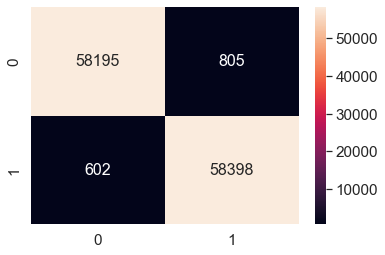

In [107]:
print("Confusion matrix heatmap for train dataset:")

df_cm_train = pd.DataFrame(conf_matrix_train)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_train, annot=True, annot_kws={"size": 16},fmt='d') # font size, 
plt.show()

In [108]:
print("Calculating cost for predicted value in train dataset...")
print("------------------------")
print("FP = ", conf_matrix_train[0][1])
print("FN = ", conf_matrix_train[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_train[0][1],"= $",conf_matrix_train[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_train[1][0],"= $",conf_matrix_train[1][0] * 500)
print("Total cost for train = $", conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500)


Calculating cost for predicted value in train dataset...
------------------------
FP =  805
FN =  602
------------------------
Cost_1 = $10 * 805 = $ 8050
Cost_2 = $500 * 602 = $ 301000
Total cost for train = $ 309050


In [109]:
tot_train_rf3 = conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500
print(tot_train_rf3)

309050


Confusion matrix heatmap for test dataset:


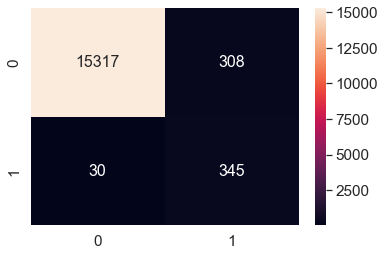

In [110]:
print("Confusion matrix heatmap for test dataset:")

df_cm_test = pd.DataFrame(conf_matrix_test)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_test, annot=True, annot_kws={"size": 16},fmt='d') # font size, 
plt.show()

In [111]:
print("Calculating cost for predicted value in test dataset...")
print("------------------------")
print("FP = ", conf_matrix_test[0][1])
print("FN = ", conf_matrix_test[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_test[0][1],"= $",conf_matrix_test[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_test[1][0],"= $",conf_matrix_test[1][0] * 500)
print("Total cost for Test = $", conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500)


Calculating cost for predicted value in test dataset...
------------------------
FP =  308
FN =  30
------------------------
Cost_1 = $10 * 308 = $ 3080
Cost_2 = $500 * 30 = $ 15000
Total cost for Test = $ 18080


In [112]:
tot_test_rf3 = conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500
print(tot_test_rf3)

18080


In [113]:
print("Classification Report for Random Forest with SMOTE and RFE:")
print(classification_report(y_test,y_pred_test))

Classification Report for Random Forest with SMOTE and RFE:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     15625
         1.0       0.53      0.92      0.67       375

    accuracy                           0.98     16000
   macro avg       0.76      0.95      0.83     16000
weighted avg       0.99      0.98      0.98     16000



#### 6. Random Forest, SMOTE oversampling to handle imbalanced data, RFE for feature selection, no hyperparamter tuning, mean imputed for missing values

In [114]:
# model fitting using the best parameter and predicting the cost
xgb_cl = XGBClassifier()
xgb_cl.fit(x_smote,y_smote)
y_pred_train = xgb_cl.predict(x_smote)
y_pred_test = xgb_cl.predict(x_test_rfe)

[17:23:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [115]:
conf_matrix_train = confusion_matrix(y_smote, y_pred_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_test)
print('Accuracy score:',accuracy_score(y_test, y_pred_test))

Accuracy score: 0.988875


Confusion matrix heatmap for train dataset:


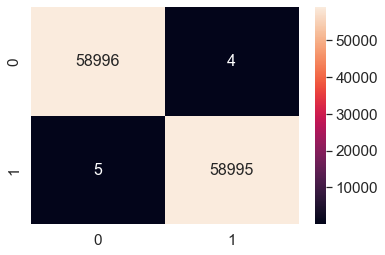

In [116]:
print("Confusion matrix heatmap for train dataset:")

df_cm_train = pd.DataFrame(conf_matrix_train)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_train, annot=True, annot_kws={"size": 16},fmt='d') # font size, 
plt.show()

In [117]:
print("Calculating cost for predicted value in train dataset...")
print("------------------------")
print("FP = ", conf_matrix_train[0][1])
print("FN = ", conf_matrix_train[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_train[0][1],"= $",conf_matrix_train[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_train[1][0],"= $",conf_matrix_train[1][0] * 500)
print("Total cost for train = $", conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500)


Calculating cost for predicted value in train dataset...
------------------------
FP =  4
FN =  5
------------------------
Cost_1 = $10 * 4 = $ 40
Cost_2 = $500 * 5 = $ 2500
Total cost for train = $ 2540


In [118]:
tot_train_xgb3 = conf_matrix_train[0][1] * 10 + conf_matrix_train[1][0] * 500
print(tot_train_xgb3)

2540


Confusion matrix heatmap for test dataset:


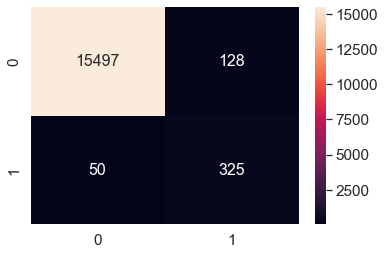

In [119]:
print("Confusion matrix heatmap for test dataset:")

df_cm_test = pd.DataFrame(conf_matrix_test)
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm_test, annot=True, annot_kws={"size": 16},fmt='d') # font size, 
plt.show()

In [120]:
print("Calculating cost for predicted value in test dataset...")
print("------------------------")
print("FP = ", conf_matrix_test[0][1])
print("FN = ", conf_matrix_test[1][0])
print("------------------------")
print("Cost_1 = $10 *",conf_matrix_test[0][1],"= $",conf_matrix_test[0][1] * 10)
print("Cost_2 = $500 *",conf_matrix_test[1][0],"= $",conf_matrix_test[1][0] * 500)
print("Total cost for Test = $", conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500)


Calculating cost for predicted value in test dataset...
------------------------
FP =  128
FN =  50
------------------------
Cost_1 = $10 * 128 = $ 1280
Cost_2 = $500 * 50 = $ 25000
Total cost for Test = $ 26280


In [121]:
tot_test_xgb3 = conf_matrix_test[0][1] * 10 + conf_matrix_test[1][0] * 500
print(tot_test_xgb3)

26280


In [122]:
print("Classification Report for XGBoost with SMOTE and RFE:")
print(classification_report(y_test,y_pred_test))

Classification Report for XGBoost with SMOTE and RFE:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     15625
         1.0       0.72      0.87      0.79       375

    accuracy                           0.99     16000
   macro avg       0.86      0.93      0.89     16000
weighted avg       0.99      0.99      0.99     16000



In [127]:
approach_train = ["RF", "RF + SMOTE", "RF + SMOTE + RFE","XGB", "XGB + SMOTE", "XGB + SMOTE + RFE"]
train_cost = [tot_train_rf1, tot_train_rf2, tot_train_rf3,tot_train_xgb1,tot_train_xgb2,tot_train_xgb3]
print('Cost for Train dataset for all 3 approaches:')
print('Cost for Train dataset for all 3 approaches:')
for n, v in zip(approach_train, train_cost):
    print("{} = {}".format(n, v))


Cost for Train dataset for all 3 approaches:
RF = 87000
RF + SMOTE = 257130
RF + SMOTE + RFE = 309050
XGB = 500
XGB + SMOTE = 500
XGB + SMOTE + RFE = 2540


In [128]:
approach_test = ["RF", "RF + SMOTE", "RF + SMOTE + RFE","XGB", "XGB + SMOTE", "XGB + SMOTE + RFE"]
test_cost = [tot_test_rf1, tot_test_rf2, tot_test_rf3,tot_test_xgb1,tot_test_xgb2,tot_test_xgb3]
print('Cost for test dataset for all 3 approaches:')
print('Cost for test dataset for all 3 approaches:')
for n, v in zip(approach_test, test_cost):
    print("{} = {}".format(n, v))


Cost for test dataset for all 3 approaches:
Cost for test dataset for all 3 approaches:
RF = 64160
RF + SMOTE = 15510
RF + SMOTE + RFE = 18080
XGB = 44170
XGB + SMOTE = 23900
XGB + SMOTE + RFE = 26280


**Summary:**
- By comparing the 2 models, Random Forest gives lower cost than XGBoost for all 3 approaches
- Lowest cost is coming from Random Forest with SMOTE but without feature selection RFE which is $15.5k (f-1 score for positive class 0.65)
- However, looking at the f1-score to predict positive class, XGBoost performs better than Random Forest

### Next steps:
1. Try different model - SVM, Logistic Regression, Gradient Boosting
2. Do hyperparameter tuning